In [ ]:
!pip install scikit-surprise


In [ ]:
from surprise import SVD, SVDpp
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse
import pandas as pd
import json
from tqdm import tqdm

In [ ]:
def load_file(string, dir = ""):
    with open(dir + string, 'r') as json_file:
        loaded_data = json.load(json_file)
    return loaded_data

def load_data():
    return load_file("user_wine_rate.json")

def load_and_parse(min_size=4):
    data = load_data()
    user = dict()
    wine = dict()
    print("initialization")
    count = dict()
    for rate in tqdm(data):
        if rate[0] not in count:
            count[rate[0]] = 1
        else:
            count[rate[0]] += 1

    filtered_data = []
    count_wine = dict()
    count_w = dict()
    count_display = dict()
    for rate in tqdm(data):
        if count[rate[0]] <= min_size:
            continue
        if count[rate[0]] not in count_display:
            count_display[count[rate[0]]] = 0
        count_display[count[rate[0]]] += 1
        filtered_data.append(rate)
        if rate[0] not in user:
            user[rate[0]] = len(user)
        if rate[1] not in wine:
            wine[rate[1]] = len(wine)
            count_w[wine[rate[1]]] = 0
            count_wine[wine[rate[1]]] = 0
        count_wine[wine[rate[1]]] += rate[2]
        count_w[wine[rate[1]]] += 1

    return filtered_data

def write_json(data, file_name, dir=""):
    with open(dir+file_name, "w") as f:
        json.dump(data, f)

In [ ]:
reader = Reader(rating_scale=(1, 5), line_format='user item rating')



In [ ]:
data = load_and_parse(min_size=2)
df_data = pd.DataFrame(data, columns=["user", "item", "rating"])# pd.read_csv('./data/ml-latest-small/ratings.csv', usecols=['userId','movieId','rating'])



initialization


100%|██████████| 436492/436492 [00:01<00:00, 347533.71it/s]


In [ ]:
surprise_data = Dataset.load_from_df(df_data, reader)
surprise_data

In [ ]:
trainset, testset = train_test_split(surprise_data, test_size=0.1)

In [ ]:
result_pp = dict()
for i in range(1, 100, 1):
  model = SVDpp(n_factors=30)
  model.fit(trainset)
  predictions = model.test(testset)
  rmse_result = rmse(predictions, verbose=True)
  result_pp[i] = rmse_result

RMSE: 0.3062
RMSE: 0.3064
RMSE: 0.3064
RMSE: 0.3065
RMSE: 0.3067
RMSE: 0.3067
RMSE: 0.3067
RMSE: 0.3073
RMSE: 0.3072
RMSE: 0.3072
RMSE: 0.3073
RMSE: 0.3074
RMSE: 0.3077
RMSE: 0.3075
RMSE: 0.3082
RMSE: 0.3080
RMSE: 0.3077
RMSE: 0.3083
RMSE: 0.3080
RMSE: 0.3084
RMSE: 0.3088
RMSE: 0.3088
RMSE: 0.3083
RMSE: 0.3086
RMSE: 0.3090
RMSE: 0.3092
RMSE: 0.3091
RMSE: 0.3094
RMSE: 0.3092
RMSE: 0.3093
RMSE: 0.3098
RMSE: 0.3096
RMSE: 0.3105
RMSE: 0.3102
RMSE: 0.3105
RMSE: 0.3101
RMSE: 0.3100
RMSE: 0.3107
RMSE: 0.3100
RMSE: 0.3102
RMSE: 0.3109
RMSE: 0.3108
RMSE: 0.3109
RMSE: 0.3114
RMSE: 0.3110
RMSE: 0.3115
RMSE: 0.3112
RMSE: 0.3118
RMSE: 0.3113
RMSE: 0.3125
RMSE: 0.3127
RMSE: 0.3124
RMSE: 0.3121
RMSE: 0.3128
RMSE: 0.3128
RMSE: 0.3130
RMSE: 0.3134
RMSE: 0.3137
RMSE: 0.3132
RMSE: 0.3127
RMSE: 0.3138
RMSE: 0.3126
RMSE: 0.3137
RMSE: 0.3140
RMSE: 0.3140
RMSE: 0.3146
RMSE: 0.3140
RMSE: 0.3148
RMSE: 0.3148
RMSE: 0.3142
RMSE: 0.3144
RMSE: 0.3150
RMSE: 0.3152


In [ ]:
result = dict()
for i in range(1, 100, 1):
  model = SVD(n_factors=i)
  model.fit(trainset)
  predictions = model.test(testset)
  rmse_result = rmse(predictions, verbose=True)
  result[i] = rmse_result

RMSE: 0.3090
RMSE: 0.3093
RMSE: 0.3092
RMSE: 0.3095
RMSE: 0.3096
RMSE: 0.3096
RMSE: 0.3097
RMSE: 0.3099
RMSE: 0.3098
RMSE: 0.3099
RMSE: 0.3102
RMSE: 0.3104
RMSE: 0.3107
RMSE: 0.3108
RMSE: 0.3112
RMSE: 0.3111
RMSE: 0.3110
RMSE: 0.3114
RMSE: 0.3114
RMSE: 0.3116
RMSE: 0.3119
RMSE: 0.3121
RMSE: 0.3121
RMSE: 0.3121
RMSE: 0.3120
RMSE: 0.3118
RMSE: 0.3120
RMSE: 0.3122
RMSE: 0.3124
RMSE: 0.3125
RMSE: 0.3130
RMSE: 0.3132
RMSE: 0.3135
RMSE: 0.3133
RMSE: 0.3135
RMSE: 0.3131
RMSE: 0.3132
RMSE: 0.3143
RMSE: 0.3135
RMSE: 0.3145
RMSE: 0.3143
RMSE: 0.3138
RMSE: 0.3143
RMSE: 0.3153
RMSE: 0.3152
RMSE: 0.3146
RMSE: 0.3153
RMSE: 0.3153
RMSE: 0.3146
RMSE: 0.3153
RMSE: 0.3159
RMSE: 0.3159
RMSE: 0.3158
RMSE: 0.3162
RMSE: 0.3165
RMSE: 0.3155
RMSE: 0.3164
RMSE: 0.3166
RMSE: 0.3172
RMSE: 0.3172
RMSE: 0.3171
RMSE: 0.3171
RMSE: 0.3175
RMSE: 0.3169
RMSE: 0.3166
RMSE: 0.3175
RMSE: 0.3175
RMSE: 0.3176
RMSE: 0.3179
RMSE: 0.3180
RMSE: 0.3173
RMSE: 0.3179
RMSE: 0.3181
RMSE: 0.3182
RMSE: 0.3186
RMSE: 0.3190
RMSE: 0.3188

In [ ]:
write_json(result, "rmse_0")

In [ ]:
result

0.31166373251574825

0.3676599095999456


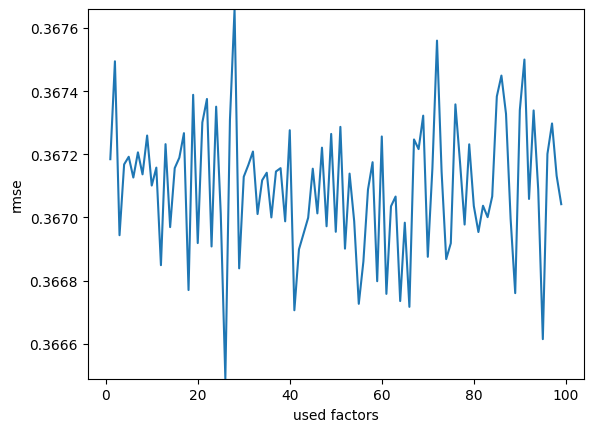

In [ ]:
draw_statis(result, x_label="used factors", y_label="rmse")

In [ ]:
print(model.pu.shape)
print(model.qi.shape)

(30888, 30)
(9477, 30)


RMSE: 0.3146


0.3145581562766072

In [ ]:
data = load_and_parse(min_size=1)

initialization


100%|██████████| 436492/436492 [00:00<00:00, 563976.04it/s]


In [ ]:
count_user = dict()
count_wine = dict()
for record in tqdm(data):
  if record[0] not in count_user:
    count_user[record[0]] = 0
  if record[1] not in count_wine:
    count_wine[record[1]] = 0
  count_wine[record[1]] += 1
  count_user[record[0]] += 1

100%|██████████| 382288/382288 [00:00<00:00, 771131.80it/s]


In [ ]:
def reverse(count):
  reverse_count = dict()
  for item in count:
    if count[item] not in reverse_count:
      reverse_count[count[item]] = 0
    reverse_count[count[item]] += 1
  return reverse_count

In [ ]:
import matplotlib.pyplot as plt

def draw_statis(data, x_label="keys", y_label="values", title="", range=None):
  data = sorted(data.items())
  keys = [item[0] for item in data]
  values = [item[1] for item in data]


  plt.plot(keys, values)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  if range:
    plt.ylim(range[0], range[1])
  else:
    plt.ylim(min(values), max(values))
  print(max(values))
  plt.show()

In [ ]:
keys = list(count_user_reverse.keys())


In [ ]:
keys.sort()

16317


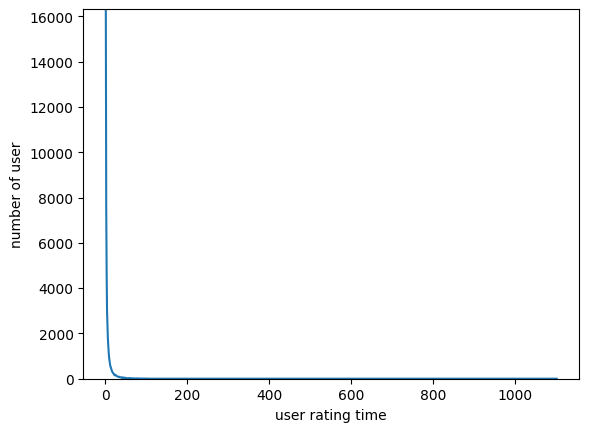

3664


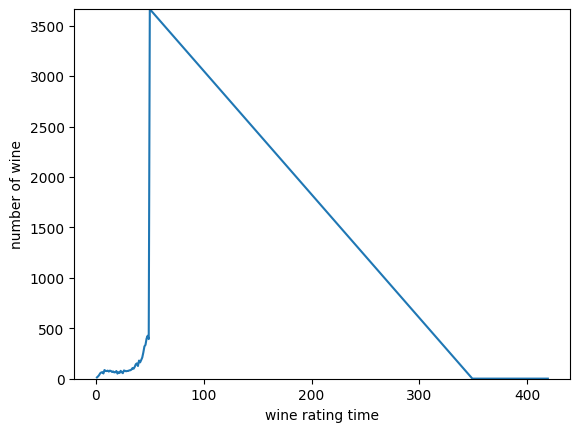

In [ ]:
count_user_reverse = reverse(count_user)
count_wine_reverse = reverse(count_wine)
draw_statis(count_user_reverse, x_label="user rating time", y_label="number of user")
draw_statis(count_wine_reverse, x_label="wine rating time", y_label="number of wine")

0.3676599095999456


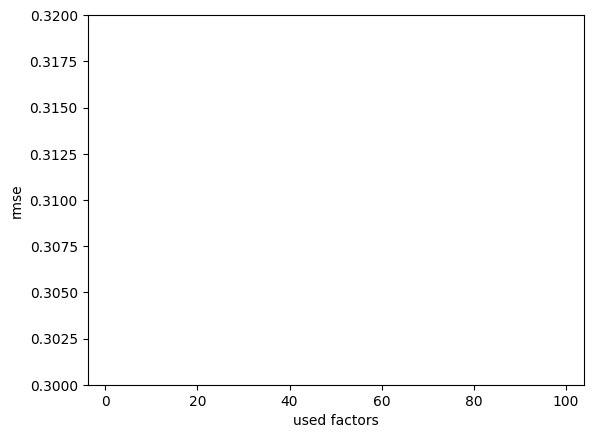

0.3122255442562488


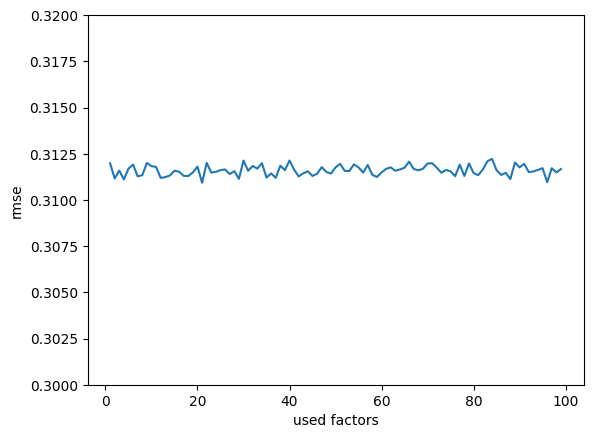

0.3122255442562488


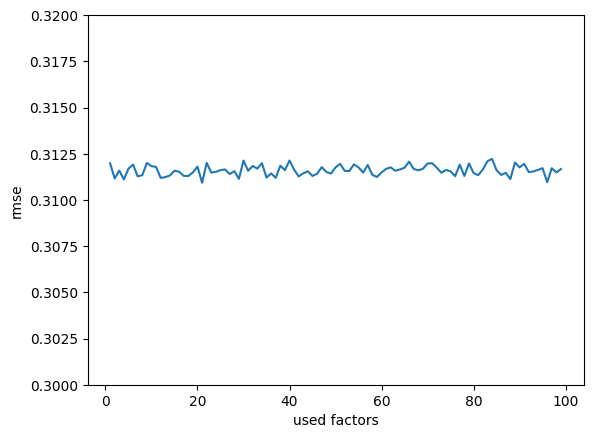

In [ ]:
for i in [0,2,4]:
  tempo = load_file("rmse_{0}".format(i))
  tempo_x = dict()
  for x in tempo:
    tempo_x[int(x)]  = tempo[x]
  draw_statis(tempo_x, x_label="used factors", y_label="rmse", range=[0.30, 0.32])

4.214781034416227


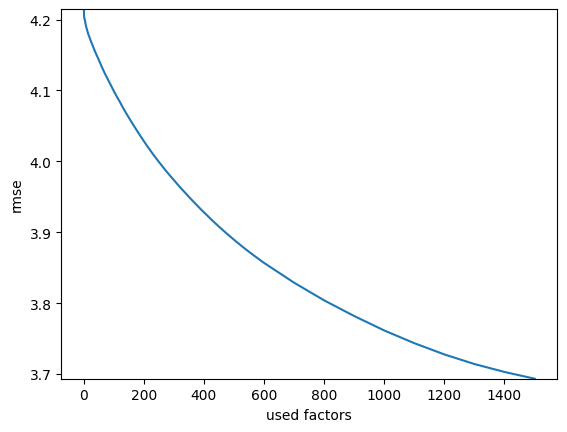

In [ ]:
tempo = load_file("svd_score_before.json")
tempo_x = dict()
for x in tempo:
  tempo_x[int(x)]  = tempo[x]
draw_statis(tempo_x, x_label="used factors", y_label="rmse")